In [ ]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Reading the data from CSV file
df=pd.read_csv('/content/gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
## Get the shape of the data
df.shape
## Output shows 5001 rows of 8 columns

(5001, 8)

In [ ]:
## Get information of data
df.info()
#The output results show which column in integer or numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
## Check for Null values in the dataset
df.isna().sum()
#The output result shows that none of the columns have null values.

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [ ]:
## Count the 'gender' column
df['gender'].value_counts()

,count
gender,
Female,2501
Male,2500


In [ ]:
## Check the column gender for the type of values
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

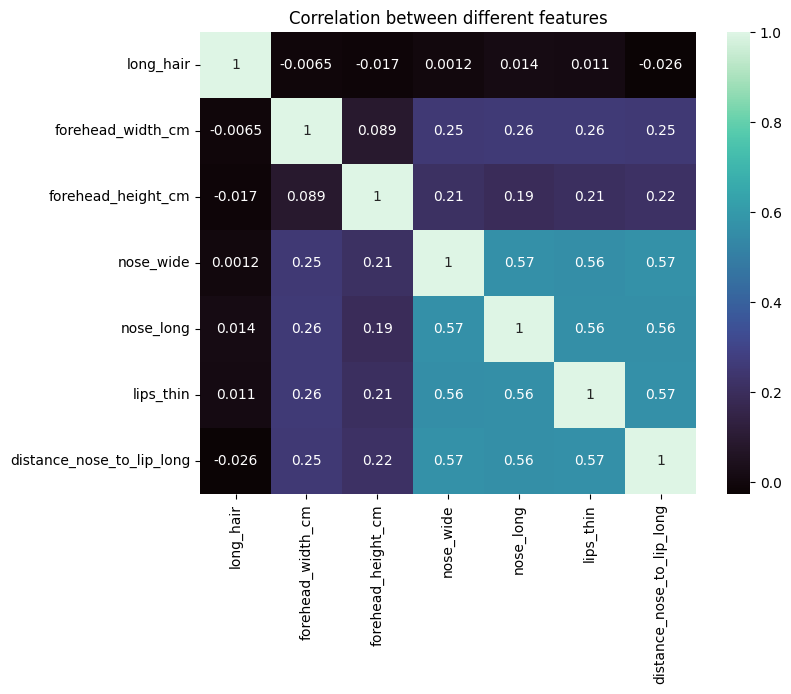

In [ ]:
## Check correlation between different features
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
cor = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=cor, annot=True, cmap='mako')
plt.title('Correlation between different features')
plt.show()


## From the heatmap, we can conclude that length of Hair is irrelevant in determining the Gender.

Text(0.5, 1.0, 'Forehead Width vs Height')

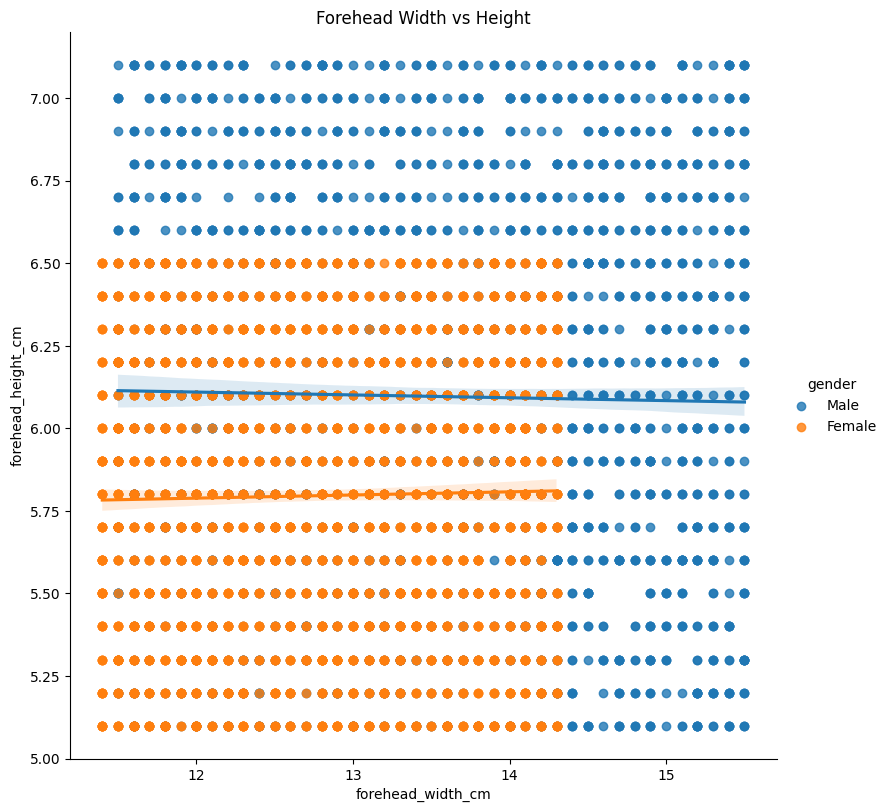

In [ ]:
## Compare Forehead Width vs Height

sns.lmplot(x="forehead_width_cm" , y="forehead_height_cm" , hue="gender" , data=df , height = 8)
fh = plt.gca()
fh.set_title("Forehead Width vs Height")

## From the chart, we can conclude that Males generally have wider and longer foreheads.

Text(0.5, 1.0, 'Nose Width vs Length')

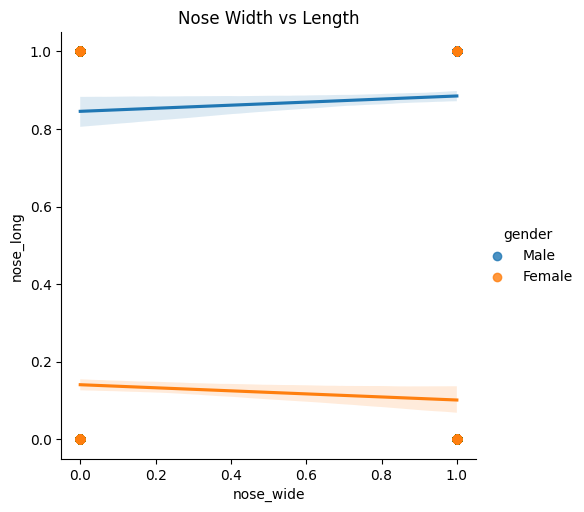

In [ ]:
## Compare Nose Width and Length

sns.lmplot(x="nose_wide", y="nose_long", hue="gender", data=df, height = 5)
nose = plt.gca()
nose.set_title("Nose Width vs Length")

## We can clearly see that Males have a longer and wider nose than Females.

Text(0.5, 1.0, 'Lips Thickness vs Lips distance to Nose')

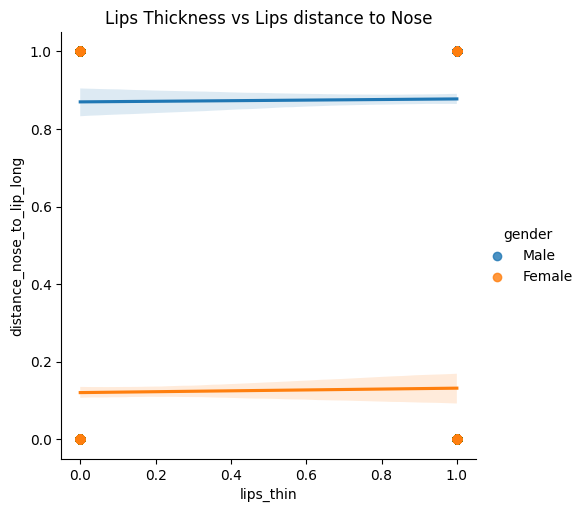

In [ ]:
## Compare Lips Thickness vs Lips distance to Nose

sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=df, height = 5)
lip = plt.gca()
lip.set_title("Lips Thickness vs Lips distance to Nose")

## From the graph, we can see that Females have thicker lips as compared to Males.
## Females also have a shorter distance between their lips to nose.

In [ ]:
## Modelling of data / Preparation for testing

from sklearn.model_selection import train_test_split

df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
## Transform column gender to numeric value for Gender
## Male = 1
## Female = 0

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
## Dropping column long_hair as it is irrelevant
## df.drop(['long_hair'],axis=1 ,inplace = True)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [ ]:
x = df.drop(columns=['gender'],axis=1) #remove gender column in the output
y = df['gender'] #only show the gender column

## I have given the paramenter for test size = 0.2 which means that 20% of the data is used for testing.
## The remaining 80% of the data is used for training.
## To get the same spilt every time, random_state = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

## Display the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(f'Size of Training set: {len(x_train), len(y_train)}')
print(f'Size of Test set {len(x_test), len(y_test)}')

(4000, 7)
(1001, 7)
(4000,)
(1001,)
Size of Training set: (4000, 4000)
Size of Test set (1001, 1001)


In [ ]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

## Create Decision Tree classifer object
dt_model = DecisionTreeClassifier(random_state=1)

## Train Decision Tree Classifer
dt_model = dt_model.fit(x_train,y_train)

## Predict the response for test dataset
y_pred = dt_model.predict(x_test)

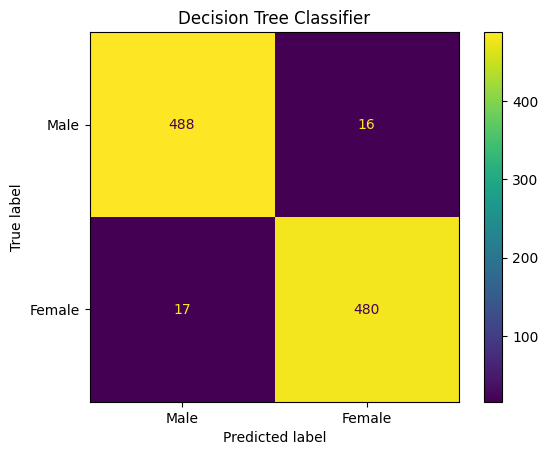

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       504
           1       0.97      0.97      0.97       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

Decision Tree Accuracy: 96.7032967032967


In [ ]:
## Reporting of Decision Tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred)
dt_cm_display = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=["Male", "Female"])

# Plot Decision Tree Confusion Matrix
dt_cm_display.plot()
plt.title('Decision Tree Classifier')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy Score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred) * 100)


In [ ]:
# prompt: save model decision tree dalam bentuk pkl

import pickle

# Save the trained model as a pickle file
filename = 'decision_tree_model.pkl'
pickle.dump(dt_model, open(filename, 'wb'))


In [ ]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression

## Create Logistic Regression classifer object
lr_model = LogisticRegression(random_state=1)

## Train Logistic Regression Classifer
lr_model = lr_model.fit(x_train,y_train)

## Predict the response for test dataset
y_pred = lr_model.predict(x_test)

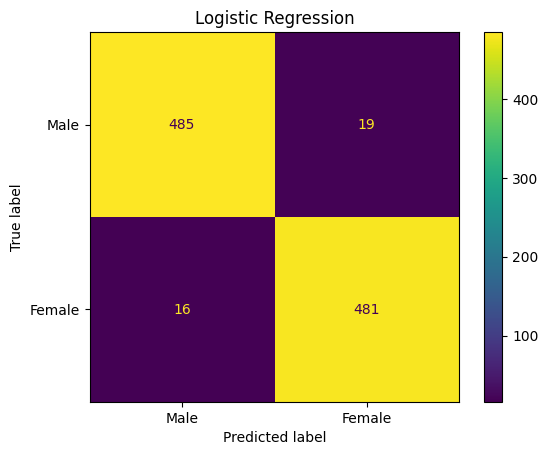

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       504
           1       0.96      0.97      0.96       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

Logistic Regression Accuracy: 96.5034965034965


In [ ]:
## Reporting of Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, y_pred)
lr_cm_display = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["Male", "Female"])

# Plot Logistic Regression Confusion Matrix
lr_cm_display.plot()
plt.title('Logistic Regression')
plt.show()

# Classification Report for Logistic Regression
print(classification_report(y_test, y_pred))

# Accuracy Score for Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred) * 100)


In [ ]:
# prompt: save model logistic regression dalam bentuk pkl

# Save the trained logistic regression model as a pickle file
filename = 'logistic_regression_model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

In [ ]:
# prompt: random forest classifier, just code

from sklearn.ensemble import RandomForestClassifier

# Assuming x_train, x_test, y_train, y_test are already defined from the previous code

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model = rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

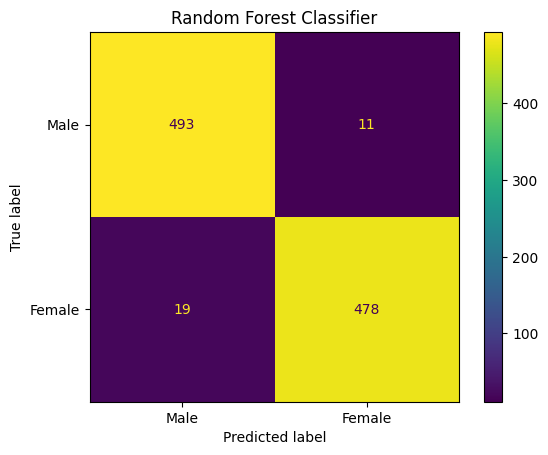

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       504
           1       0.98      0.96      0.97       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

Random Forest Accuracy: 97.002997002997


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Reporting of Random Forest
rf_cm = confusion_matrix(y_test, y_pred)
rf_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["Male", "Female"])
rf_cm_display.plot()
plt.title('Random Forest Classifier')
plt.show()

print(classification_report(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred) * 100)

In [ ]:
import pickle

# Save the trained random forest model as a pickle file
filename = 'random_forest_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load the trained Random Forest model
with open('random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Input features from the user
forehead_width_cm = float(input("Enter forehead width (cm): "))
forehead_height_cm = float(input("Enter forehead height (cm): "))
nose_wide = float(input("Enter nose wide (0 or 1): "))
nose_long = float(input("Enter nose long (0 or 1): "))
lips_thin = float(input("Enter lips thin (0 or 1): "))
distance_nose_to_lip_long = float(input("Enter distance nose to lip long (0 or 1): "))
long_hair = float(input("Enter long hair (0 or 1): ")) # Add input for 'long_hair'


# Create a DataFrame for prediction
input_data = pd.DataFrame({
    'forehead_width_cm': [forehead_width_cm],
    'forehead_height_cm': [forehead_height_cm],
    'nose_wide': [nose_wide],
    'nose_long': [nose_long],
    'lips_thin': [lips_thin],
    'distance_nose_to_lip_long': [distance_nose_to_lip_long],
    'long_hair': [long_hair]
}, index=[0]) # Added index to avoid potential issues

# Get the feature names from the trained model
feature_names = rf_model.feature_names_in_

# Reorder the columns of input_data to match the training data
input_data = input_data[feature_names]

# Make the prediction
prediction = rf_model.predict(input_data)

# Display the prediction
if prediction[0] == 1:
    print("Predicted Gender: Male")
else:
    print("Predicted Gender: Female")

Enter forehead width (cm): 5
Enter forehead height (cm): 5
Enter nose wide (0 or 1): 0
Enter nose long (0 or 1): 0
Enter lips thin (0 or 1): 1
Enter distance nose to lip long (0 or 1): 1
Enter long hair (0 or 1): 0
Predicted Gender: Male


In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load the trained Random Forest model
with open('decision_tree_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

# Input features from the user
forehead_width_cm = float(input("Enter forehead width (cm): "))
forehead_height_cm = float(input("Enter forehead height (cm): "))
nose_wide = float(input("Enter nose wide (0 or 1): "))
nose_long = float(input("Enter nose long (0 or 1): "))
lips_thin = float(input("Enter lips thin (0 or 1): "))
distance_nose_to_lip_long = float(input("Enter distance nose to lip long (0 or 1): "))
long_hair = float(input("Enter long hair (0 or 1): ")) # Add input for 'long_hair'


# Create a DataFrame for prediction
input_data = pd.DataFrame({
    'forehead_width_cm': [forehead_width_cm],
    'forehead_height_cm': [forehead_height_cm],
    'nose_wide': [nose_wide],
    'nose_long': [nose_long],
    'lips_thin': [lips_thin],
    'distance_nose_to_lip_long': [distance_nose_to_lip_long],
    'long_hair': [long_hair]
}, index=[0]) # Added index to avoid potential issues

# Get the feature names from the trained model
feature_names = dt_model.feature_names_in_

# Reorder the columns of input_data to match the training data
input_data = input_data[feature_names]

# Make the prediction
prediction = dt_model.predict(input_data)

# Display the prediction
if prediction[0] == 1:
    print("Predicted Gender: Male")
else:
    print("Predicted Gender: Female")

Enter forehead width (cm): 5
Enter forehead height (cm): 5
Enter nose wide (0 or 1): 0
Enter nose long (0 or 1): 0
Enter lips thin (0 or 1): 1
Enter distance nose to lip long (0 or 1): 1
Enter long hair (0 or 1): 0
Predicted Gender: Male


In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load the trained Random Forest model
with open('logistic_regression_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)

# Input features from the user
forehead_width_cm = float(input("Enter forehead width (cm): "))
forehead_height_cm = float(input("Enter forehead height (cm): "))
nose_wide = float(input("Enter nose wide (0 or 1): "))
nose_long = float(input("Enter nose long (0 or 1): "))
lips_thin = float(input("Enter lips thin (0 or 1): "))
distance_nose_to_lip_long = float(input("Enter distance nose to lip long (0 or 1): "))
long_hair = float(input("Enter long hair (0 or 1): ")) # Add input for 'long_hair'


# Create a DataFrame for prediction
input_data = pd.DataFrame({
    'forehead_width_cm': [forehead_width_cm],
    'forehead_height_cm': [forehead_height_cm],
    'nose_wide': [nose_wide],
    'nose_long': [nose_long],
    'lips_thin': [lips_thin],
    'dis1tance_nose_to_lip_long': [distance_nose_to_lip_long],
    'long_hair': [long_hair]
}, index=[0]) # Added index to avoid potential issues

# Get the feature names from the trained model
feature_names = lr_model.feature_names_in_

# Reorder the columns of input_data to match the training data
input_data = input_data[feature_names]

# Make the prediction
prediction = lr_model.predict(input_data)

# Display the prediction
if prediction[0] == 1:
    print("Predicted Gender: Male")
else:
    print("Predicted Gender: Female")

Enter forehead width (cm): 5
Enter forehead height (cm): 5
Enter nose wide (0 or 1): 0
Enter nose long (0 or 1): 0
Enter lips thin (0 or 1): 1
Enter distance nose to lip long (0 or 1): 1
Enter long hair (0 or 1): 0
Predicted Gender: Female
